# K-Means clustering

> K-Means is an unsupervised learning algorithm used to group data into k clusters based on similarity.

- Type: Unsupervised
- Task: Clustering (finding groups in unlabeled data).
- How it works: Iteratively assigns points to clusters and updates centroids.
- Output: Cluster labels (no pre-existing ground truth).
- Example: Grouping customers into segments without knowing their categories beforehand.

## How it works
- Randomly placing k cluster centers (called centroids).
- Assigning each point to the nearest centroid.
- Updating centroids as the mean of assigned points.
- Repeating until assignments stop changing (convergence).
The goal: minimize within-cluster variance (points inside a cluster should be as close to each other as possible).

## When to use
When to Use K-Means
- ✅ **Good for:**
  - Customer segmentation
  - Grouping similar products or behaviors
  - Image compression (reducing colors)
  - Discovering structure in unlabeled data
- ❌ **Avoid if:**
    - Data is not numeric (needs meaningful distance measure).
    - Clusters are not spherical (K-Means assumes circular/symmetric clusters).
    - There are many outliers (they can drag centroids away).
    - You don’t know a good value for k (although methods like the elbow method help).

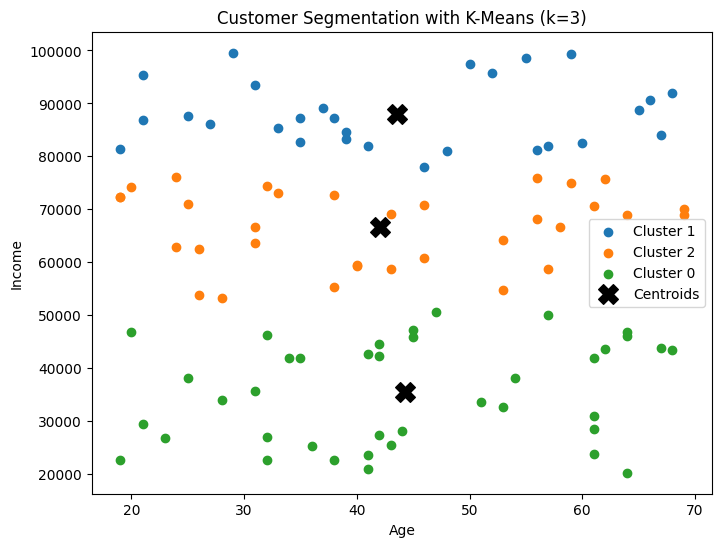

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Generate synthetic dataset
np.random.seed(42)
age = np.random.randint(18, 70, 100)
income = np.random.randint(20000, 100000, 100)
data = pd.DataFrame({"Age": age, "Income": income})

# Step 2: Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(data[["Age", "Income"]])

# Step 3: Plot clusters
plt.figure(figsize=(8,6))
for cluster in data["Cluster"].unique():
    cluster_points = data[data["Cluster"] == cluster]
    plt.scatter(cluster_points["Age"], cluster_points["Income"], label=f"Cluster {cluster}")

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            color="black", marker="X", s=200, label="Centroids")

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation with K-Means (k=3)")
plt.legend()
plt.show()
